In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#words sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

word_sequence = " ".join(sentences).split()
print(word_sequence)

['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']


In [3]:
#set 함수는 중복 제거
word_list = list(set(word_sequence))
print(word_list)

['hate', 'i', 'movie', 'fish', 'milk', 'apple', 'cat', 'eyes', 'book', 'dog', 'music', 'like', 'animal']


In [4]:
#단어에 index 붙이기
word_dict = {w : i for i, w in enumerate(word_list)}
print(word_dict)

{'hate': 0, 'i': 1, 'movie': 2, 'fish': 3, 'milk': 4, 'apple': 5, 'cat': 6, 'eyes': 7, 'book': 8, 'dog': 9, 'music': 10, 'like': 11, 'animal': 12}


## What is skip-gram?
Skip-gram is one of the unsupervised learning techniques used to find the most related words for a given word. In short, it is used to predict the context word for a given target word.
> https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c (eng)
>https://daewonyoon.tistory.com/241 (kor)

![image](https://user-images.githubusercontent.com/35142536/60235510-fc092780-98e2-11e9-8a3f-735067dfc438.png)

Instructions for updating:
Colocations handled automatically by placer.
Epoch  0100 cost =  2.752562
Epoch  0200 cost =  2.602247
Epoch  0300 cost =  2.556606
Epoch  0400 cost =  2.396443
Epoch  0500 cost =  2.446794
Epoch  0600 cost =  2.201423
Epoch  0700 cost =  2.315049
Epoch  0800 cost =  2.399379
Epoch  0900 cost =  2.281087
Epoch  1000 cost =  2.275872
Epoch  1100 cost =  2.077428
Epoch  1200 cost =  2.475971
Epoch  1300 cost =  2.288138
Epoch  1400 cost =  2.206176
Epoch  1500 cost =  2.134828
Epoch  1600 cost =  2.139932
Epoch  1700 cost =  2.178108
Epoch  1800 cost =  1.965353
Epoch  1900 cost =  1.723281
Epoch  2000 cost =  2.026011
Epoch  2100 cost =  2.139395
Epoch  2200 cost =  2.296395
Epoch  2300 cost =  1.632899
Epoch  2400 cost =  2.120555
Epoch  2500 cost =  2.002764
Epoch  2600 cost =  2.097517
Epoch  2700 cost =  2.007781
Epoch  2800 cost =  1.944270
Epoch  2900 cost =  1.825908
Epoch  3000 cost =  1.968854
Epoch  3100 cost =  2.009549
Epoch  3200 cost =  1.710156


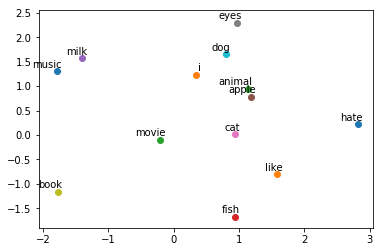

In [5]:
tf.reset_default_graph()

#word2vec parameter
batch_size = 20
embedding_size = 2   #2 dim graph
voc_size = len(word_list)

def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)),size,replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]]) #target
        random_labels.append(np.eye(voc_size)[data[i][1]]) #context word
    return random_inputs, random_labels

#make skip-gram of 1 size window  == total 2 words
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
    
    for w in context:
        skip_grams.append([target, w])
        
#model
inputs= tf.placeholder(tf.float32, shape=[None, voc_size])
labels = tf.placeholder(tf.float32, shape=[None, voc_size])

# W and WT is not Traspose relationship
W = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
WT = tf.Variable(tf.random_uniform([embedding_size, voc_size], -1.0, 1.0))

#one hidden layer
hidden_layer = tf.matmul(inputs, W) #[batch_size, embedding_size]
output_layer = tf.matmul(hidden_layer, WT) #[batch_size, voc_size]

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#running Computations in a Session
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(5000):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict = {inputs: batch_inputs, labels: batch_labels})
        
        if (epoch + 1) %100 == 0:
            print('Epoch ', '%04d' % (epoch+1), 'cost = ', '{:.6f}'.format(loss))
        
        trained_embeddings = W.eval()

 #graph display       
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()